In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow.keras import datasets, layers, models, losses
import matplotlib.pyplot as plt

TensorFlow version: 2.9.2


In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


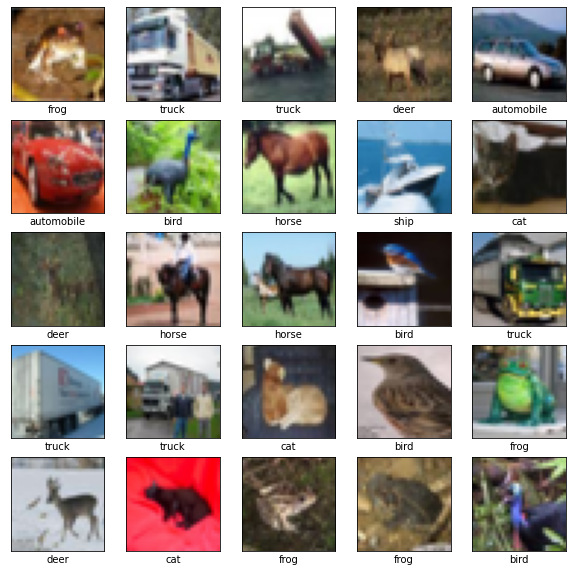

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same',input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [15]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [16]:
model.compile(optimizer='adam',
              loss=losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7891 - accuracy: 0.7260 - val_loss: 0.8894 - val_accuracy: 0.7037
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.5899 - accuracy: 0.7978 - val_loss: 0.8888 - val_accuracy: 0.7165
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5508 - accuracy: 0.8096 - val_loss: 0.9666 - val_accuracy: 0.6888
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.5241 - accuracy: 0.8210 - val_loss: 0.9333 - val_accuracy: 0.7084
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4950 - accuracy: 0.8294 - val_loss: 0.9666 - val_accuracy: 0.7151
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4674 - accuracy: 0.8386 - val_loss: 0.9424 - val_accuracy: 0.7140
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4503 - accuracy: 0.8463 - val_loss: 1.0340 - val_accuracy:

313/313 - 1s - loss: 1.1199 - accuracy: 0.7054 - 714ms/epoch - 2ms/step


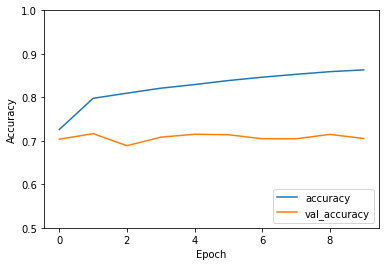

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [14]:
print(test_acc)

0.7178999781608582
